<a href="https://colab.research.google.com/github/pratyush-3000/me/blob/master/Pratyush_Lahane_Final_Project_Credit_Card_Fraud_Detection_Classification_NEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import kagglehub

path = kagglehub.dataset_download("nelgiriyewithana/credit-card-fraud-detection-dataset-2023")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/versions/1


In [15]:
import kagglehub
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

print("Downloading dataset...")
dataset_dir = kagglehub.dataset_download("nelgiriyewithana/credit-card-fraud-detection-dataset-2023")

# THis is neded in order to locate the CSV file in the directory
for filename in os.listdir(dataset_dir):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(dataset_dir, filename)
        break

df = pd.read_csv(csv_file_path)

print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

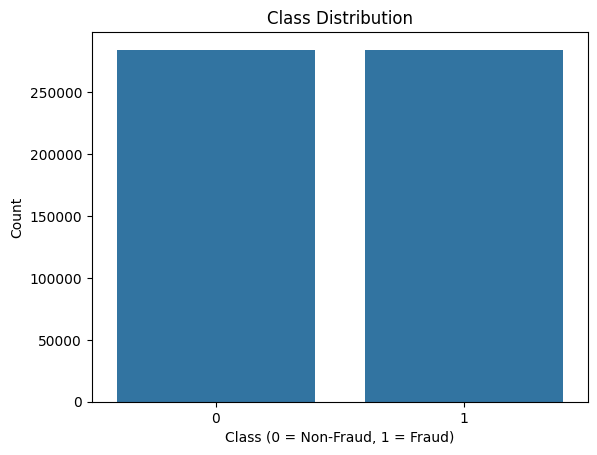

In [16]:
# This is to visualize class distribution
sns.countplot(data=df, x='Class')
plt.title('Class Distribution')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()


In [17]:
# This condition is to drop unnecessary columns if they exist
if 'id' in df.columns:
    df = df.drop(['id'], axis=1)
else:
    print("'id' column not found. Skipping drop operation.")

# Using 10% quicker model training)
df_sampled = df.sample(frac=0.1, random_state=42)


X = df_sampled.drop('Class', axis=1)
y = df_sampled['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
# Define models to train
models = {
    "SGDClassifier": SGDClassifier(random_state=42),
    "SVM (Linear)": SVC(kernel="linear", random_state=42),
    "SVM (RBF)": SVC(kernel="rbf", random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}



In [19]:
# Initialize the results list
results = []

# THis is to train and evaluate models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_scaled, y_train)

    # This will predict on train and test data
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    # Calculates train metrics
    precision_train = precision_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)
    conf_matrix_train = confusion_matrix(y_train, y_pred_train)

    # Calculates test metrics
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    conf_matrix_test = confusion_matrix(y_test, y_pred_test)

    # Store results for all
    results.append({
        "Model": model_name,
        "Precision (Train)": precision_train,
        "Recall (Train)": recall_train,
        "F1 Score (Train)": f1_train,
        "Precision (Test)": precision_test,
        "Recall (Test)": recall_test,
        "F1 Score (Test)": f1_test
    })

    # This will print train and test metrics
    print(f"\n{model_name} Evaluation:")
    print("Confusion Matrix (Train):\n", conf_matrix_train)
    print(f"Precision (Train): {precision_train:.4f}")
    print(f"Recall (Train): {recall_train:.4f}")
    print(f"F1 Score (Train): {f1_train:.4f}")

    print("\nConfusion Matrix (Test):\n", conf_matrix_test)
    print(f"Precision (Test): {precision_test:.4f}")
    print(f"Recall (Test): {recall_test:.4f}")
    print(f"F1 Score (Test): {f1_test:.4f}")

# Finally this will print overall results summary
import pandas as pd
results_df = pd.DataFrame(results)
print("\nSummary of Model Performance:")
print(results_df)


Training SGDClassifier...

SGDClassifier Evaluation:
Confusion Matrix (Train):
 [[19333   616]
 [  807 19048]]
Precision (Train): 0.9687
Recall (Train): 0.9594
F1 Score (Train): 0.9640

Confusion Matrix (Test):
 [[8323  227]
 [ 352 8157]]
Precision (Test): 0.9729
Recall (Test): 0.9586
F1 Score (Test): 0.9657
Training SVM (Linear)...

SVM (Linear) Evaluation:
Confusion Matrix (Train):
 [[19579   370]
 [  988 18867]]
Precision (Train): 0.9808
Recall (Train): 0.9502
F1 Score (Train): 0.9653

Confusion Matrix (Test):
 [[8409  141]
 [ 430 8079]]
Precision (Test): 0.9828
Recall (Test): 0.9495
F1 Score (Test): 0.9659
Training SVM (RBF)...

SVM (RBF) Evaluation:
Confusion Matrix (Train):
 [[19815   134]
 [  338 19517]]
Precision (Train): 0.9932
Recall (Train): 0.9830
F1 Score (Train): 0.9881

Confusion Matrix (Test):
 [[8485   65]
 [ 143 8366]]
Precision (Test): 0.9923
Recall (Test): 0.9832
F1 Score (Test): 0.9877
Training Decision Tree...

Decision Tree Evaluation:
Confusion Matrix (Train):
 

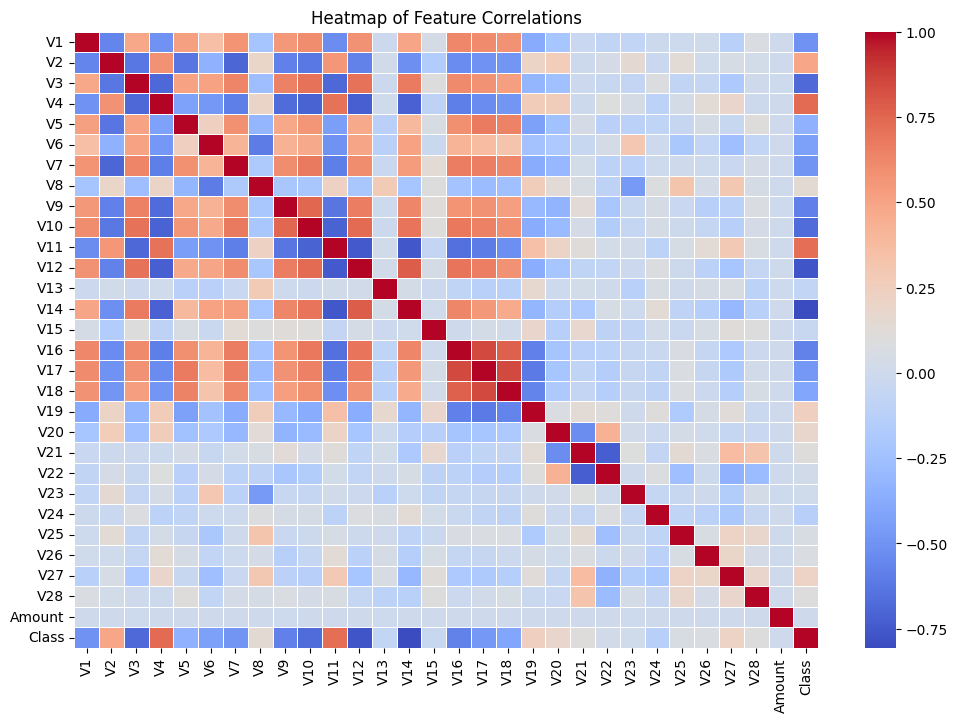

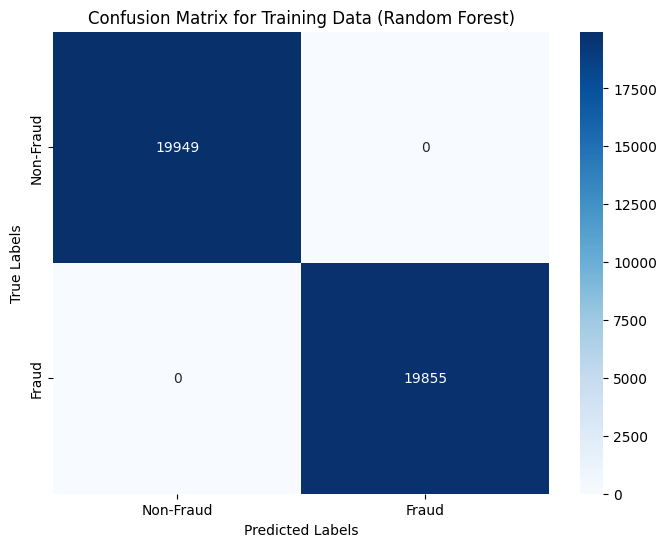

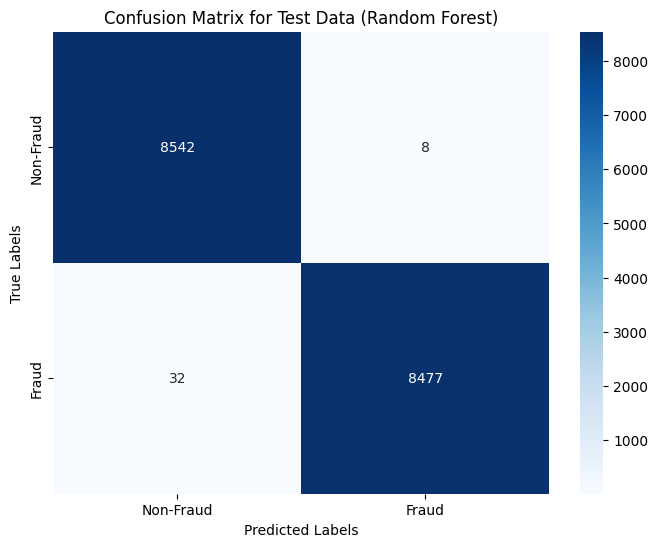

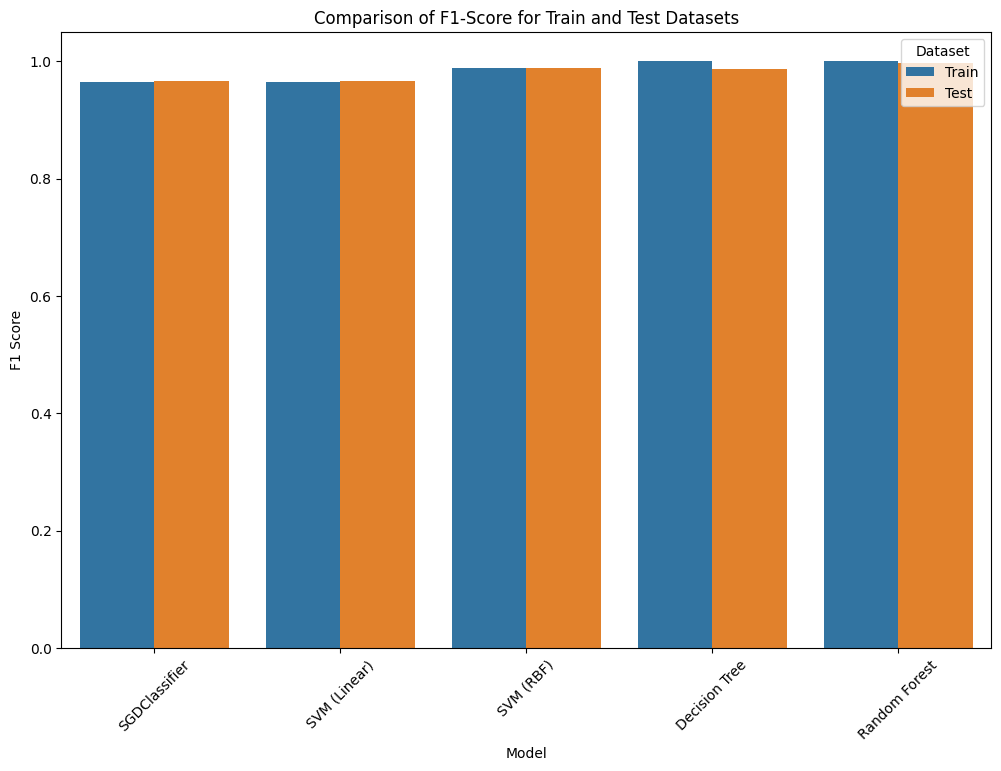

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Used to generate a heatmap to show correlations
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Feature Correlations")
plt.show()

#  I am using best model which is random foret to generate predications
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train_scaled, y_train)

# Predicting for both the train and test datasets
y_pred_train = best_model.predict(X_train_scaled)
y_pred_test = best_model.predict(X_test_scaled)

# Creating confusion matrix
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Plotting the confusion matrix training dataset
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title("Confusion Matrix for Training Data (Random Forest)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Plotting the confusion matrix test dataset
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title("Confusion Matrix for Test Data (Random Forest)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

metrics = {"Model": [], "Dataset": [], "Precision": [], "Recall": [], "F1 Score": []}

for model_name, model in models.items():
    y_pred_train = model.predict(X_train_scaled)
    precision_train = precision_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)

    y_pred_test = model.predict(X_test_scaled)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)

    metrics["Model"].extend([model_name, model_name])
    metrics["Dataset"].extend(["Train", "Test"])
    metrics["Precision"].extend([precision_train, precision_test])
    metrics["Recall"].extend([recall_train, recall_test])
    metrics["F1 Score"].extend([f1_train, f1_test])

# Creating a DataFrame in order to visual
metrics_df = pd.DataFrame(metrics)

# Comparing Train vs Test
plt.figure(figsize=(12, 8))
sns.barplot(x="Model", y="F1 Score", hue="Dataset", data=metrics_df)
plt.title("Comparison of F1-Score for Train and Test Datasets")
plt.ylabel("F1 Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(title="Dataset")
plt.show()
